# Chapter 3 Classification

MINIST Dataset 
    
   - from sklearn.datasets import fetch_openml
   
SGD 

## MNIST
 
MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Cen‐sus Bureau. Each image is labeled with the digit it represents. 

In [1]:
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
sklearn.__version__ >='0.2'

True

### Import MNIST Dataset

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version = 1, as_frame=False)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure, includ‐ing the following: 

• A DESCR key describing the dataset 

• A data key containing an array with one row per instance and one column per feature 

• A target key containing an array with the labels

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

70,000 images, and each image has 784 features. 

This is because each image is 28 × 28 pixels, each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

In [9]:
some_digit = X[0]
some_digit_img = some_digit.reshape(28,28)

In [10]:
some_digit.dtype

dtype('float64')

In [11]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
some_digit_img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

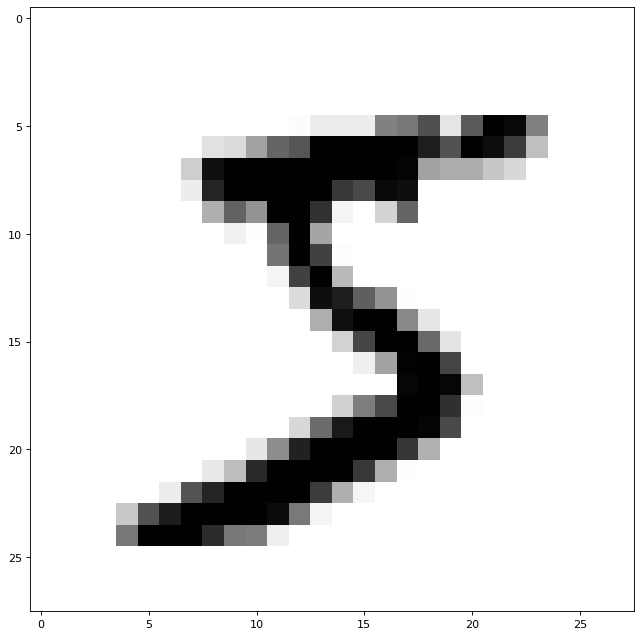

The label tells us it is 5


In [13]:
_, ax = plt.subplots(figsize=(10,10),dpi=80)
plt.imshow(some_digit_img, cmap=mpl.cm.binary)
plt.show()
print(f'The label tells us it is {y[0]}')

In [14]:
# plot first 100 omages from mnist
def plt_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,
              interpolation="nearest")
    plt.axis("off")

In [15]:
# def plot_digits(instances, images_per_row=10,**options):
#     size=28
#     images_per_row = min(len(instances), images_per_row)
#     images = [instance.reshape(size,size) for instance in instances]
#     n_rows = (len(instances)-1)//images_per_row + 1
#     row_images = []
#     n_empty = n_rows * images_per_row - len(instances)
#     images.append(###### see， you jumped the lines.....#### np.concatenate(rimages, axis=1))

In [16]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))

    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

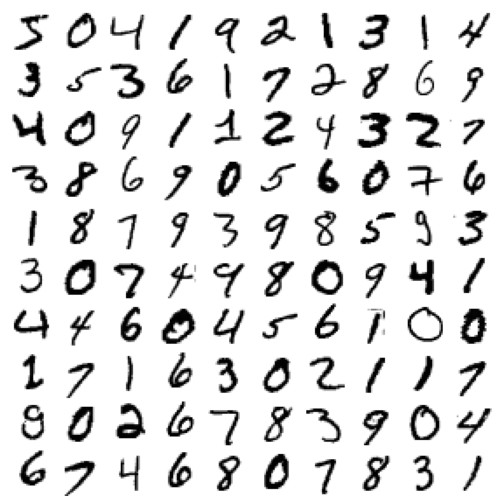

In [17]:
plt.figure(figsize=(9,9))

example_images = X[:100]
plot_digits(example_images,images_per_row=10)
plt.show()

In [18]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [19]:
# Cast y to integer:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

### Binary Classifier

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=42)

In [22]:
X_train.shape, y_test.shape

((63000, 784), (7000,))

In [23]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [25]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [27]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True)

Looks like it guessed right in this particular case! Now, let’s evaluate this model’s performance.

#### Cross validation

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
clone_clf = clone(sgd_clf)

In [68]:
for train_index, test_index in skfolds.split(X_train, y_train_5):

    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9631904761904762
0.9658095238095238
0.955047619047619


use the cross_val_score() function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96914286, 0.96366667, 0.96319048])

dumb classifier that just classifies every single image in the “not-5” class

In [72]:
from sklearn.base import BaseEstimator

In [74]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self,X,):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

In [75]:
cross_val_score(never_5_clf, X_train, y_train_5,cv=3,scoring="accuracy")

array([0.91019048, 0.90952381, 0.911     ])

#### Confusion Matrix

In [76]:
from sklearn.model_selection import cross_val_predict

In [77]:
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5,cv=3)

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_train_5,y_train_pred)

array([[56326,  1019],
       [ 1165,  4490]])

In [80]:
# Pretending we reach the perfection
perfect_y_train_predictions = y_train_5
confusion_matrix(y_train_5, perfect_y_train_predictions)

array([[57345,     0],
       [    0,  5655]])

#### Precision and Recall

In [81]:
from sklearn.metrics import precision_score,recall_score

In [82]:
precision_score(y_train_5,y_train_pred)

0.8150299509892902